# 7 - Carga y preprocesamiento de datos (Ejercicios)

En este apartado, hemos estudiado uno de los componentes más importantes del ciclo de vida de los modelos de inteligencia artificial: la adquisición y manipulación de los datos. En los conjuntos de datos propuestos, tendremos por una parte la información relativa a los atributos de la muestra, y por otra los nombres de los mismos. Tu tarea será:

* Importar desde consola por comandos Linux los ficheros oportunos.
* Leer los ficheros `data` y `names`.
* Explorar el fichero `names` para analizar qué tipo de expresiones regulares necesitas para identificar los nombres de las columnas en la metadata.
* Aplicar las transformaciones *regex* pertinentes y obtener los nombres de las columnas para construir los datos. *Pista: El nombre de la variable respuesta tendremos que añadirlo al final ya que no viene explícitamente citado*.
* Realizar un conveniente preprocesmiento de las variables en función de su tipo.

## 7.1 - *Adult* [dataset](https://archive.ics.uci.edu/ml/datasets/Adult)



In [1]:
import os
import re
import pandas as pd
import numpy as np

In [3]:
os.getcwd()

'/content/adult_dataset'

In [2]:
# Creamos una carpeta para que contenga a nuestro dataset
!mkdir /content/adult_dataset

# Movemos el directorio activo a esa localización
%cd /content/adult_dataset

# Descargamos el fichero que contiene los datos a nuestro directorio activo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

# Descargamos la metadata asociada al conjunto de datos
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

/content/adult_dataset
--2022-06-10 13:55:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  3.50MB/s    in 1.1s    

2022-06-10 13:55:51 (3.50 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-06-10 13:55:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/



```python
# Librería para el uso de expresiones regulares
import re

# Expresión regular que cumple todos los requisitos anteriores
## '\s{1}' sirve para detectar exactamente un espacio
## '\s+' sirve para detectar uno o más espacios
## '\d+' sirve para detectar uno o más dígitos
## [.] sirve para localizar exactamente un punto
## '[a-zA-Z]+' sirve para detectar cadenas de texto no vacías con letras del alfabeto
regex_fn = lambda text: re.findall('^\s+\d+[.]\s{1}[a-zA-Z]+', text)

# Aplicamos la expresión regular en forma de lambda a al metadata
# Téngase en cuenta que el método findall devuelve una lista vacía
# si ninguna expresión coincide con el patrón introducido
metadata = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
```



In [173]:
# Leemos metadata
with open(os.path.join(os.getcwd(),'adult.names'),'r') as f:
    metadata = f.read().splitlines()

regex_fn = lambda text: re.findall('^[a-zA-Z-]+:{1}', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z- ]+', text)
metadata_list = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)] + ['label']

# Leemos el archivo usando read csv de pandas
file_path = os.path.join(os.getcwd(),'adult.data')

data = pd.read_csv(file_path, names = col_names)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Tras un rato visualizando los datos, hemos podido apreciar que las variables de tipo cualitativo tienen un espacio al principio, por tal de homogeneizar esto, aplicamos la función `strip()` al dataframe.

In [174]:
columnas_objeto = data.select_dtypes('object').columns

data[columnas_objeto] = data[columnas_objeto].applymap(lambda x: x.strip())

In [66]:
# Leemos datos
with open(os.path.join(os.getcwd(),'adult.data'),'r') as f:
    data = f.read().splitlines() # Dividimos el texto por saltos de línea
    data = [elem.split(',') for elem in data] # Dividimos cada línea por las comas y removemos líneas vacías

# Leemos metadata
with open(os.path.join(os.getcwd(),'adult.names'),'r') as f:
    metadata = f.read().splitlines()

# Regex
regex_fn = lambda text: re.findall('^[a-zA-Z-]+:{1}', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z- ]+', text)
metadata_list = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)] + ['label']

# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)

In [67]:
df.drop([df.shape[0] - 1], axis = 0, inplace = True)

## Ejercicio Propuesto

Crea una función que tenga como parámetro de entrada un `dataframe` y devuelva una lista de tuplas, siendo el primer elemento de la tupla el nombre de una columna, y el segundo valor de la tupla el número de valores únicos de la columna.


**Output a obtener:**
```
[('age', 73),
 ('workclass', 9),
 ('fnlwgt', 21648),
 ('education', 16),
 ('education-num', 16),
 ('marital-status', 7),
 ('occupation', 15),
 ('relationship', 6),
 ('race', 5),
 ('sex', 2),
 ('capital-gain', 119),
 ('capital-loss', 92),
 ('hours-per-week', 94),
 ('native-country', 42),
 ('label', 2)]
```



In [206]:
def obtener_valores_unicos(data: pd.DataFrame) -> list:
    """
    Esta función admite como parámetro de entrada un Dataframe
    Y devuelve una lista de tuplas, donde el primer elemento se
    corresponde con el nombre de la columna, y el segundo, al 
    número de elementos únicos de la columna
    
    """
    return [(col, data[col].nunique()) for col in data.columns]

In [99]:
obtener_valores_unicos(data = data)

[('age', 73),
 ('workclass', 9),
 ('fnlwgt', 21648),
 ('education', 16),
 ('education-num', 16),
 ('marital-status', 7),
 ('occupation', 15),
 ('relationship', 6),
 ('race', 5),
 ('sex', 2),
 ('capital-gain', 119),
 ('capital-loss', 92),
 ('hours-per-week', 94),
 ('native-country', 42),
 ('label', 2)]

## Estudio de valores faltantes


> Efectivamente, existen valores faltantes, que vienen codificados en la forma ` ?`. Principalmente se encuentran en 3 columnas.

> Nota: Podemos observar que en 2 de estas columnas, existe una clase mayoritaria, y por tanto, podríamos pensar en imputar valores faltantes utilizando la moda.



In [175]:
s = (data == '?').sum()

columnas_faltantes = s[s > 0].index

data[columnas_faltantes] = data[columnas_faltantes].replace('?', np.nan)

In [119]:
for col in columnas_faltantes:

    print(col)
    print(data[col].value_counts())
    print()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

native-country
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba      

## Estandarizamos las variables continuas

In [176]:
variables_enteras = data.select_dtypes('int64').columns

data_aux = data[variables_enteras].copy()

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_estandarizado = pd.DataFrame(scaler.fit_transform(data_aux), columns = variables_enteras)

In [178]:
data.drop(variables_enteras, axis = 'columns', inplace = True)

In [179]:
data = pd.concat([data, data_estandarizado], axis = 1)

## Arreglamos variables de tipo discreto + `label`

In [180]:
data['label'] = np.where(data['label'] == '>50K', 1, 0)

In [181]:
data.rename(columns = {'sex':'sex_female'}, inplace = True)

In [183]:
data['sex_female'] = np.where(data['sex_female'] == 'Female', 1, 0)

In [196]:
s = data.isna().sum()
columnas_faltantes = s[s > 0].index

## Generamos una columna que nos indique los valores faltantes por registro.

In [191]:
data['FALTANTES'] = data.isna().sum(axis = 1)

In [197]:
data[data['FALTANTES'] > 0][columnas_faltantes]

,workclass,occupation,native-country
14,Private,Craft-repair,NaN
27,NaN,NaN,South
38,Private,Sales,NaN
51,Private,Other-service,NaN
61,NaN,NaN,NaN
...,...,...,...
32530,NaN,NaN,United-States
32531,NaN,NaN,United-States
32539,NaN,NaN,United-States
32541,NaN,NaN,United-States


## Para poder seguir trabajando sin mayor problema, voy a eliminar los registros con más de un valor faltante.

In [199]:
data = data[data['FALTANTES'] == 0]

In [ ]:
data.drop('FALTANTES', axis = 'columns', inplace = True)

In [218]:
import seaborn as sns

In [225]:
data[0:2]

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,workclass,education,marital-status,occupation,relationship,sex_female,native-country,label,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,1,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,0,United-States,0,0.301370,0.044302,0.8,0.02174,0.0,0.397959
1,0,0,0,0,1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,United-States,0,0.452055,0.048238,0.8,0.00000,0.0,0.122449


posx and posy should be finite values
posx and posy should be finite values


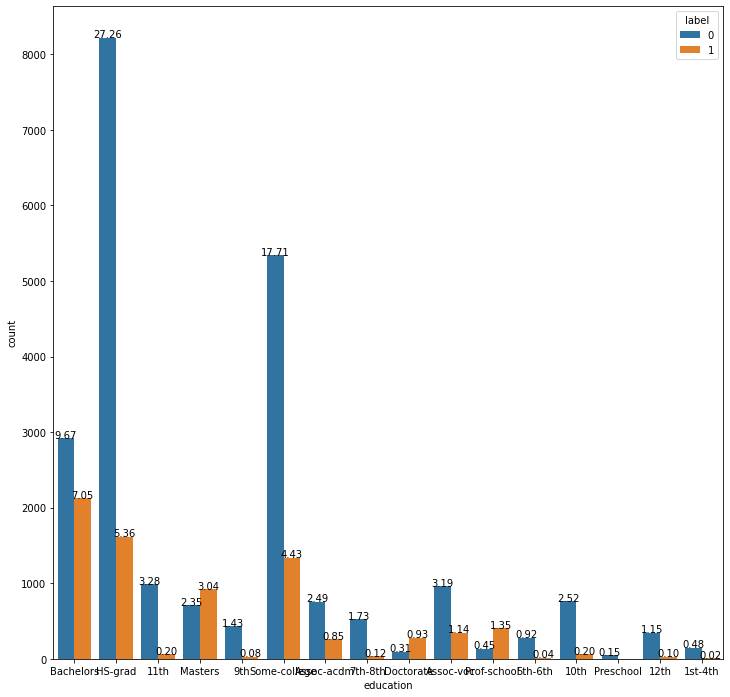

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
total = float(len(data["label"]) )

ax = sns.countplot(x="education", hue="label", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [207]:
obtener_valores_unicos(data.select_dtypes('object')) 

[('workclass', 7),
 ('education', 16),
 ('marital-status', 7),
 ('occupation', 14),
 ('relationship', 6),
 ('race', 5),
 ('native-country', 41)]

Para la función de raza vamos a usar la función 
[`pd.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [215]:
data = pd.concat([pd.get_dummies(data['race']), data], axis = 1)
data.drop('race', axis = 'columns', inplace = True)

In [217]:
data.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,workclass,education,marital-status,occupation,relationship,sex_female,native-country,label,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,1,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,0,United-States,0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0,0,0,0,1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,United-States,0,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0,0,0,0,1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,United-States,0,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0,0,1,0,0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,United-States,0,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0,0,1,0,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,1,Cuba,0,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [208]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

## 7.2 - Beijing Multi-Site [Air Quality Data](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)

En este conjunto de datos no tendremos que hacer un esfuerzo muy grande en lo relativo a estudiar la *metadata*, pero exploraremos una serie de comandos de Linux que nos será muy útil conocer:

In [ ]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos un nivel
%cd ..
## Creamos carpeta
!mkdir /content/air_quality_dataset
## Movemos directorio activo
%cd /content/air_quality_dataset
# Descargamos fichero comprimido
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
# Descargamos el fichero que contiene los datos a nuestro directorio activo
!unzip PRSA2017_Data_20130301-20170228.zip
# Nos movemos a la carpeta que contenía el zip
%cd PRSA_Data_20130301-20170228

Ahora te toca, ¿eres capaz de leer todos los `csv`, concatenarlos y construir un `pd.DataFrame` en una sola línea de código?


```python
df = pd.concat([pd.read_csv(elem) for elem in os.listdir()]).reset_index(drop=True)
```

## 7.3 - Solar flare [dataset](https://archive.ics.uci.edu/ml/datasets/Solar+Flare)

En este conjunto de datos, tendremos dos ficheros relativos a `data`, cuya primera fila serán las especificaciones temporales, por lo que deberemos quitarla, y además en los registros de datos las variables no vienen delimitadas por `','`, si no por espacios en blanco:

In [ ]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos dos niveles
%cd ..
%cd ..
## Creamos carpeta
!mkdir /content/solar_flare_dataset
## Movemos directorio activo
%cd /content/solar_flare_dataset
# Descargamos los ficheros que contienen los datos a nuestro directorio activo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2
# Descargamos la metadata asociada al conjunto de datos
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.names
# Leemos datos
## Leemos primer fichero de datos
with open(os.path.join(os.getcwd(),'flare.data1'),'r') as f:
    data1 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data1 = [elem.split(' ') for elem in data1 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data1 = data1[1:] # Quitamos la línea de metadata temporal
## Leemos segundo fichero de datos
with open(os.path.join(os.getcwd(),'flare.data2'),'r') as f:
    data2 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data2 = [elem.split(' ') for elem in data2 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data2 = data2[1:] # Quitamos la línea de metadata temporal
## Combinamos ambas listas
data = data1+data2
# Leemos metadata
with open(os.path.join(os.getcwd(),'flare.names'),'r') as f:
    metadata = f.read().splitlines()
## Regex
regex_fn = lambda text: re.findall('^\s+[0-9]+\.{1}\s{1}[a-zA-Z- ]+', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z-]+', text)
metadata_list = [regex_fn(elem)[0].strip() for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)]
# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)